In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#getting data
da=pd.read_excel('C:/Data sets/ola and uber.xlsx')

In [3]:
#dataset overview
da.head

<bound method NDFrame.head of            source Company                             review_id  \
0     Google Play     Ola  fbc7ffc9-5a89-446e-87fd-d69bf4a7f984   
1     Google Play     Ola  5a0051fb-220a-45b2-ba94-a15a2949218f   
2     Google Play     Ola  71ebf933-b734-474d-bb65-a18c90906ed2   
3     Google Play     Ola  e1cc0010-60b3-4126-99c2-e8549088566a   
4     Google Play     Ola  77cf1be1-b428-4493-ae25-e0f288f79b8f   
...           ...     ...                                   ...   
1892  Google Play    Uber  09fee52f-d3f7-4465-9301-40ffbd6f650c   
1893  Google Play    Uber  eb6065c2-c906-491f-aa2b-be541e880275   
1894  Google Play    Uber  49f57294-fa59-41a6-9999-3110af074780   
1895  Google Play    Uber  0dedd459-892c-40d6-b7e0-587c86781d68   
1896  Google Play    Uber  d46cfc8c-cf8f-46fc-a299-49451a893386   

                  user_name review_title  \
0             Puipuii Ralte          NaN   
1              Deepak Kumar          NaN   
2          Ahamed Azarudeen      

In [4]:
da.tail

<bound method NDFrame.tail of            source Company                             review_id  \
0     Google Play     Ola  fbc7ffc9-5a89-446e-87fd-d69bf4a7f984   
1     Google Play     Ola  5a0051fb-220a-45b2-ba94-a15a2949218f   
2     Google Play     Ola  71ebf933-b734-474d-bb65-a18c90906ed2   
3     Google Play     Ola  e1cc0010-60b3-4126-99c2-e8549088566a   
4     Google Play     Ola  77cf1be1-b428-4493-ae25-e0f288f79b8f   
...           ...     ...                                   ...   
1892  Google Play    Uber  09fee52f-d3f7-4465-9301-40ffbd6f650c   
1893  Google Play    Uber  eb6065c2-c906-491f-aa2b-be541e880275   
1894  Google Play    Uber  49f57294-fa59-41a6-9999-3110af074780   
1895  Google Play    Uber  0dedd459-892c-40d6-b7e0-587c86781d68   
1896  Google Play    Uber  d46cfc8c-cf8f-46fc-a299-49451a893386   

                  user_name review_title  \
0             Puipuii Ralte          NaN   
1              Deepak Kumar          NaN   
2          Ahamed Azarudeen      

In [5]:
da.columns

Index(['source', 'Company', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'appVersion',
       'laguage_code', 'country_code'],
      dtype='object')

In [6]:
da.shape

(1897, 14)

In [7]:
da.dtypes


source                             object
Company                            object
review_id                          object
user_name                          object
review_title                       object
review_description                 object
rating                              int64
thumbs_up                         float64
review_date                datetime64[ns]
developer_response                 object
developer_response_date    datetime64[ns]
appVersion                         object
laguage_code                       object
country_code                       object
dtype: object

In [8]:
da.info

<bound method DataFrame.info of            source Company                             review_id  \
0     Google Play     Ola  fbc7ffc9-5a89-446e-87fd-d69bf4a7f984   
1     Google Play     Ola  5a0051fb-220a-45b2-ba94-a15a2949218f   
2     Google Play     Ola  71ebf933-b734-474d-bb65-a18c90906ed2   
3     Google Play     Ola  e1cc0010-60b3-4126-99c2-e8549088566a   
4     Google Play     Ola  77cf1be1-b428-4493-ae25-e0f288f79b8f   
...           ...     ...                                   ...   
1892  Google Play    Uber  09fee52f-d3f7-4465-9301-40ffbd6f650c   
1893  Google Play    Uber  eb6065c2-c906-491f-aa2b-be541e880275   
1894  Google Play    Uber  49f57294-fa59-41a6-9999-3110af074780   
1895  Google Play    Uber  0dedd459-892c-40d6-b7e0-587c86781d68   
1896  Google Play    Uber  d46cfc8c-cf8f-46fc-a299-49451a893386   

                  user_name review_title  \
0             Puipuii Ralte          NaN   
1              Deepak Kumar          NaN   
2          Ahamed Azarudeen    

In [9]:
#duplicates finding
da.duplicated().sum()


0

In [10]:
df=da[['Company', 'review_description', 'rating', 'review_date']]

In [11]:
#missing values
df.isna().sum()


Company               0
review_description    1
rating                0
review_date           0
dtype: int64

In [43]:
#filled missing values as no review
df['review_description'].fillna('No Review', inplace=True)
df.isna().sum()


Company               0
review_description    0
rating                0
review_date           0
dtype: int64

In [46]:
df.nunique()

Company                  2
review_description    1487
rating                   5
review_date           1896
dtype: int64

<Axes: xlabel='Company', ylabel='count'>

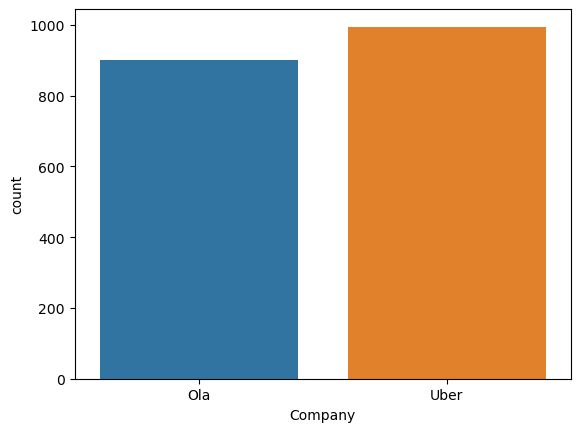

In [14]:
#visualizaion of whole ratings
sns.countplot(data=df, x=df['Company'])

<Axes: xlabel='rating', ylabel='count'>

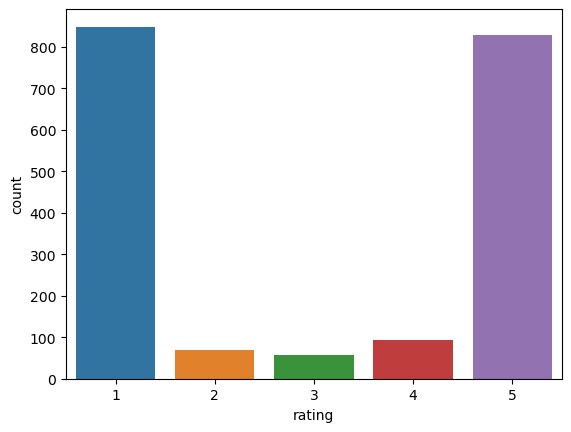

In [15]:
#visualization of 1,2,3,4,5 ratings
sns.countplot(data=df, x='rating')

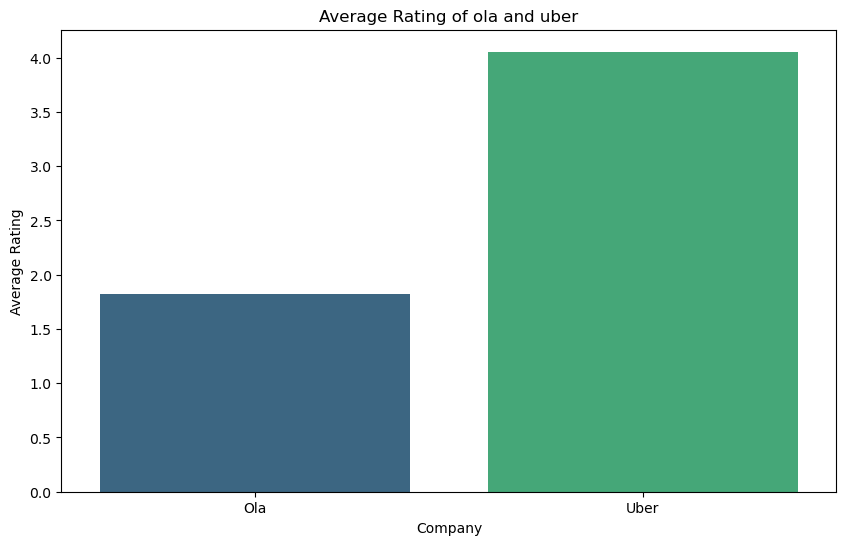

In [16]:
#avg ratings of ola and uber
avg_rating = df.groupby('Company')['rating'].mean().reset_index()

# Plotting the distribution of ratings for each company
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating, x='Company', y='rating', palette='viridis')
plt.title('Average Rating of ola and uber')
plt.xlabel('Company')
plt.ylabel('Average Rating')
plt.show()


In [54]:
# text preprocessing
import nltk

#lowercase
df.columns
df['Company']=df['Company'].apply(lambda x:x.lower())
df['review_description']=df['review_description'].apply(lambda x:x.lower())


In [55]:
#tokenization
from nltk.tokenize import word_tokenize
df['Company']=df['Company'].apply(word_tokenize)
df['review_description']=df['review_description'].apply(word_tokenize)

In [56]:
import string
#removing punctuation
punch=set(string.punctuation)
df['Company']=df['Company'].apply(lambda x: [word for word in x if word not in punch])
df['review_description']=df['review_description'].apply(lambda x: [word for word in x if word not in punch])


In [57]:
#removing stop words
from nltk.corpus import stopwords
st_wo=set(stopwords.words('english'))
df['Company']=df['Company'].apply(lambda x: [word for word in x if word not in st_wo])
df['review_description']=df['review_description'].apply(lambda x:[ word for word in x if word not in st_wo])


In [58]:
#Removing special characters
df['Company'] = df['Company'].apply(lambda x: [word for word in x if word.isalnum()])
df['review_description'] = df['review_description'].apply(lambda x: [word for word in x if word.isalnum()])


In [59]:
#lemitization
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Company'] = df['Company'].apply(lambda x: [lem.lemmatize(word) for word in x])
df['review_description'] = df['review_description'].apply(lambda x: [lem.lemmatize(word) for word in x])


In [60]:
#Combine tokens back into text
df['Company']=df['Company'].apply(lambda x: ' '.join(x))
df['review_description'] = df['review_description'].apply(lambda x:' '.join(x))


In [61]:
df

,Company,review_description,rating,review_date
0,ola,map ola messed pay extra map incorrect app req...,1,2023-08-10 16:40:50
1,ola,deepak kumar,5,2023-08-10 16:36:14
2,ola,aa irresponsible app waiting 1 hour waste app ...,1,2023-08-10 16:29:31
3,ola,worst,1,2023-08-10 15:52:06
4,ola,much expensive try uber providing cheap ride o...,1,2023-08-10 15:51:10
...,...,...,...,...
1892,uber,good,4,2023-08-09 01:59:47
1893,uber,call safety ask multiple option response worst,1,2023-08-09 01:58:30
1894,uber,superb,5,2023-08-09 01:57:55
1895,uber,great personality nice ride,5,2023-08-09 01:55:42


In [25]:
# Filtering the DataFrame for each company
company1 = df[df['Company'] == 'ola']['review_description']
company2 = df[df['Company'] == 'uber']['review_description']


In [26]:
company1

0      map ola messed pay extra map incorrect app req...
1                                           deepak kumar
2      aa irresponsible app waiting 1 hour waste app ...
3                                                  worst
4      much expensive try uber providing cheap ride o...
                             ...                        
897    worst app book option assign ticket car well a...
898                                                 nice
899                                             best app
900    today booked cab initially cab booked driver c...
901    year drove cab made payment cash till today pa...
Name: review_description, Length: 902, dtype: object

In [27]:
#sentiment analysis 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

ana=SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    sentiment = ana.polarity_scores(text)
    return sentiment['compound']

In [62]:
# Filtering DataFrame for Company1
df_company1 = df[df['Company'] == 'ola']
# Applying sentiment analysis to Company1 reviews
df_company1['Sentiment_Score'] = df_company1['review_description'].apply(get_sentiment_score)


In [29]:
df_company1

,Company,review_description,rating,review_date,Sentiment_Score
0,ola,map ola messed pay extra map incorrect app req...,1,2023-08-10 16:40:50,-0.4215
1,ola,deepak kumar,5,2023-08-10 16:36:14,0.0000
2,ola,aa irresponsible app waiting 1 hour waste app ...,1,2023-08-10 16:29:31,-0.5267
3,ola,worst,1,2023-08-10 15:52:06,-0.6249
4,ola,much expensive try uber providing cheap ride o...,1,2023-08-10 15:51:10,0.0000
...,...,...,...,...,...
897,ola,worst app book option assign ticket car well a...,1,2023-08-01 01:31:01,-0.8481
898,ola,nice,5,2023-08-01 01:22:57,0.4215
899,ola,best app,4,2023-08-01 00:54:11,0.6369
900,ola,today booked cab initially cab booked driver c...,1,2023-08-02 12:23:27,-0.3818


In [63]:
# Filtering DataFrame for Company2
df_company2 = df[df['Company'] == 'uber']
# Applying sentiment analysis to Company2 reviews
df_company2['Sentiment_Score'] = df_company2['review_description'].apply(get_sentiment_score)


In [31]:
df_company2

,Company,review_description,rating,review_date,Sentiment_Score
902,uber,suddenly driver ca location calling ask going ...,1,2023-08-10 17:48:51,-0.4576
903,uber,cordial helped quick turnaround ride well done,5,2023-08-10 17:38:35,0.2732
904,uber,good experience,5,2023-08-10 17:38:17,0.4404
905,uber,use,5,2023-08-10 17:37:45,0.0000
906,uber,enjoyed traveling uber driver polite good conv...,5,2023-08-10 17:36:56,0.8876
...,...,...,...,...,...
1892,uber,good,4,2023-08-09 01:59:47,0.4404
1893,uber,call safety ask multiple option response worst,1,2023-08-09 01:58:30,-0.3182
1894,uber,superb,5,2023-08-09 01:57:55,0.6249
1895,uber,great personality nice ride,5,2023-08-09 01:55:42,0.7845


In [32]:
# Finding the sentiment_scores values as object = positive, negative, and neutral
# thresholds values for sentiment
positive_val= 0.2
negative_val= -0.2

# function to categorize sentiment scores
def score_to_sentiment(score):
    if score > positive_val:
        return 'Positive'
    elif score < negative_val:
        return 'Negative'
    else:
        return 'Neutral'

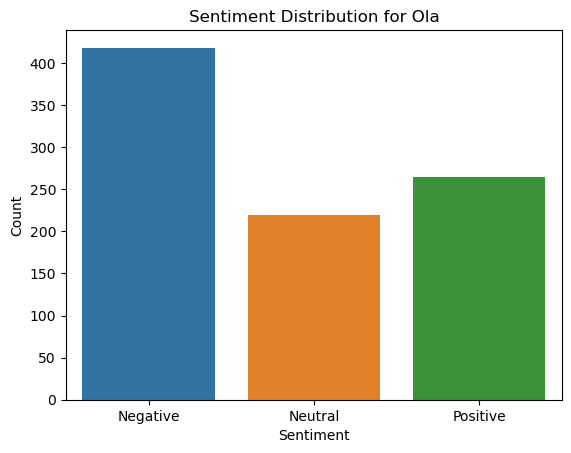

In [64]:
# sentiment for company1
df_company1['Sentiment'] = df_company1['Sentiment_Score'].apply(score_to_sentiment)

sns.countplot(data=df_company1, x=df_company1['Sentiment'])
plt.title('Sentiment Distribution for Ola')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

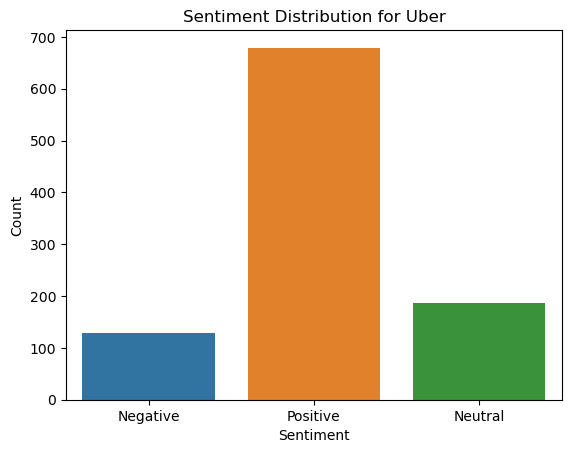

In [65]:
# Apply the function to the Sentiment_Score column to create a new column for sentiment categories for Company2
df_company2['Sentiment'] = df_company2['Sentiment_Score'].apply(score_to_sentiment)

sns.countplot(data=df_company2, x=df_company2['Sentiment'])
plt.title('Sentiment Distribution for Uber')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [70]:
# Random text for testing sentiment analysis
random_text = "wow great app, traveled in low cost "
random_text2= "worst app"
#sentiment analysis on the random text
sentiment = get_sentiment_score(random_text)
sentiment1= get_sentiment_score(random_text2)

# sentiment analysis result
print("Sentiment of the text:", sentiment)
print("Sentiment of the text1:",sentiment1 )

Sentiment of the text: 0.7783
Sentiment of the text1: -0.6249


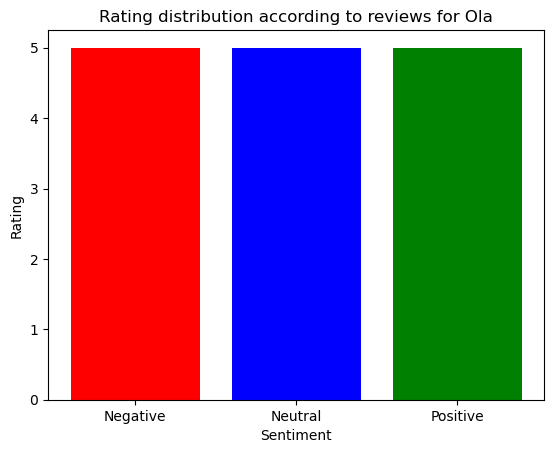

In [36]:
# Rating distribution according to reviews for Ola
#relationship between ratings and reviews
# Colors for each bar
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

x=df_company1['Sentiment']
y=df_company1['rating']
plt.bar(x,y, color=[colors[s] for s in x])
plt.title('Rating distribution according to reviews for Ola')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


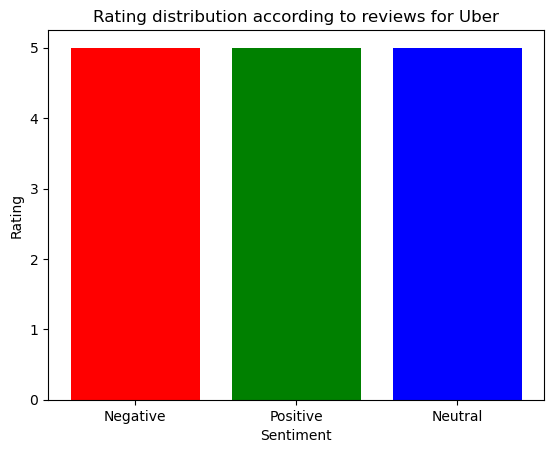

In [37]:
# Rating distribution according to reviews for Uber, relationship between ratings and reviews
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

x=df_company2['Sentiment']
y=df_company2['rating']
plt.bar(x,y, color=[colors[s] for s in x])
plt.title('Rating distribution according to reviews for Uber')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

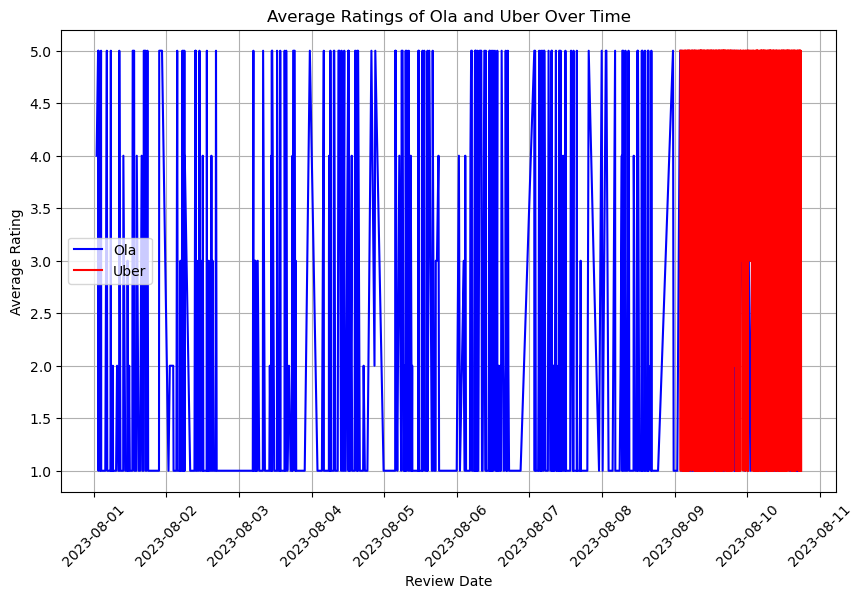

In [38]:
#Average Ratings of Ola and Uber Over Time
ola_avg_ratings = df_company1.groupby('review_date')['rating'].mean()
uber_avg_ratings = df_company2.groupby('review_date')['rating'].mean()

plt.figure(figsize=(10, 6))

# Plot average ratings for Ola
plt.plot(ola_avg_ratings.index, ola_avg_ratings.values, label='Ola', color='blue')

# Plot average ratings for Uber
plt.plot(uber_avg_ratings.index, uber_avg_ratings.values, label='Uber', color='red')

# Add labels and title
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Ola and Uber Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


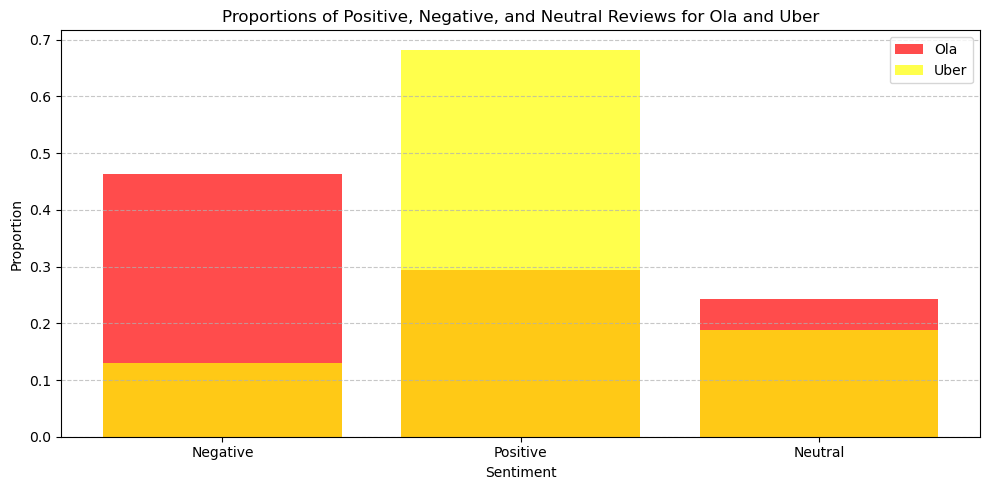

In [39]:
#Which company has a higher proportion of positive, negative, and neutral reviews
ola_sentiment_counts = df_company1['Sentiment'].value_counts(normalize=True)
uber_sentiment_counts = df_company2['Sentiment'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(ola_sentiment_counts.index, ola_sentiment_counts.values, color='red', label='Ola', alpha=0.7)
plt.bar(uber_sentiment_counts.index, uber_sentiment_counts.values, color="yellow", label='Uber', alpha=0.7)

plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportions of Positive, Negative, and Neutral Reviews for Ola and Uber')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [71]:
#Most Common Reasons for Positive Reviews for ola and uber

from collections import Counter

ola_positive_reviews = df_company1[df_company1['Sentiment'] == 'Positive']['review_description']
uber_positive_reviews = df_company2[df_company2['Sentiment'] == 'Positive']['review_description']

#Tokenize and count words for Ola
ola_positive_words = [word for review in ola_positive_reviews for word in word_tokenize(review.lower())]
ola_word_counts = Counter(ola_positive_words)

#Tokenize and count words for Uber
uber_positive_words = [word for review in uber_positive_reviews for word in word_tokenize(review.lower())]
uber_word_counts = Counter(uber_positive_words)

#Selecting the top N most common words
top_n = 10
ola_top_words = dict(ola_word_counts.most_common(top_n))
uber_top_words = dict(uber_word_counts.most_common(top_n))

#top words for Ola
print("Top {} Most Common Words in Positive Reviews for Ola:".format(top_n))
print(ola_top_words)

#top words for Uber
print("\nTop {} Most Common Words in Positive Reviews for Uber:".format(top_n))
print(uber_top_words)




Top 10 Most Common Words in Positive Reviews for Ola:
{'ola': 109, 'app': 65, 'good': 63, 'driver': 60, 'ride': 48, 'support': 48, 'customer': 44, 'service': 35, 'money': 30, 'please': 28}

Top 10 Most Common Words in Positive Reviews for Uber:
{'good': 246, 'driver': 108, 'service': 88, 'app': 71, 'uber': 69, 'nice': 63, 'great': 60, 'easy': 46, 'excellent': 46, 'ride': 43}


In [72]:
#Most Common Reasons for Negative Reviews for ola and uber

ola_negative_reviews = df_company1[df_company1['Sentiment'] == 'Negative']['review_description']
uber_negative_reviews = df_company2[df_company2['Sentiment'] == 'Negative']['review_description']

#Tokenize and count words for Ola
ola_word_counts = ola_negative_reviews.str.lower().str.split().explode().value_counts()

#Tokenize and count words for Uber
uber_word_counts = uber_negative_reviews.str.lower().str.split().explode().value_counts()

#Selecting the top N most common words
top_n = 10
ola_top_negative_reasons = ola_word_counts.head(top_n)
uber_top_negative_reasons = uber_word_counts.head(top_n)

print("Top {} Most Common Reasons for Negative Reviews for Ola:".format(top_n))
print(ola_top_negative_reasons)

print("\nTop {} Most Common Reasons for Negative Reviews for Uber:".format(top_n))
print(uber_top_negative_reasons)



Top 10 Most Common Reasons for Negative Reviews for Ola:
driver      256
ola         232
ride        191
app         190
worst       154
service     119
time         98
customer     90
bad          89
money        82
Name: review_description, dtype: int64

Top 10 Most Common Reasons for Negative Reviews for Uber:
driver      85
app         58
uber        53
ride        51
time        39
cancel      39
service     30
customer    27
bad         25
money       24
Name: review_description, dtype: int64
